In [328]:
## Data profiling
### 1. General information about the dataset (rows, cols, language text distribution)
### 2. Data enrichment setting labels (0: not Italian, 1: Italian)
### 3. Pre-processing text column
### 4. Profiling of the dataset
##### Information computed
#####   4.1. avg len of phrases
#####   4.2 unique words vs not unique words
#####   4.3 Shared words in Italian and not italian vocabulary


In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### 1. General information


In [330]:
original_dataset=pd.read_csv('..\\..\\Dataset\\Language Detection.csv')

original_dataset.head(10)


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


### 1. General Information about the dataset 

In [331]:
#Genenarl information about the dataset
#name of columns
#number of columns
#number of rows
cols=list(original_dataset.columns)
numb_cols=len(cols)
numb_rows=original_dataset.shape[0]
print('Cols:',cols,'(#',numb_cols,')')
print('rows:',numb_rows)

Cols: ['Text', 'Language'] (# 2 )
rows: 10337


In [332]:
#computing the cardinality of languages present in the original dataset
cardinality_languages=original_dataset['Language'].value_counts()

cardinality_languages


English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

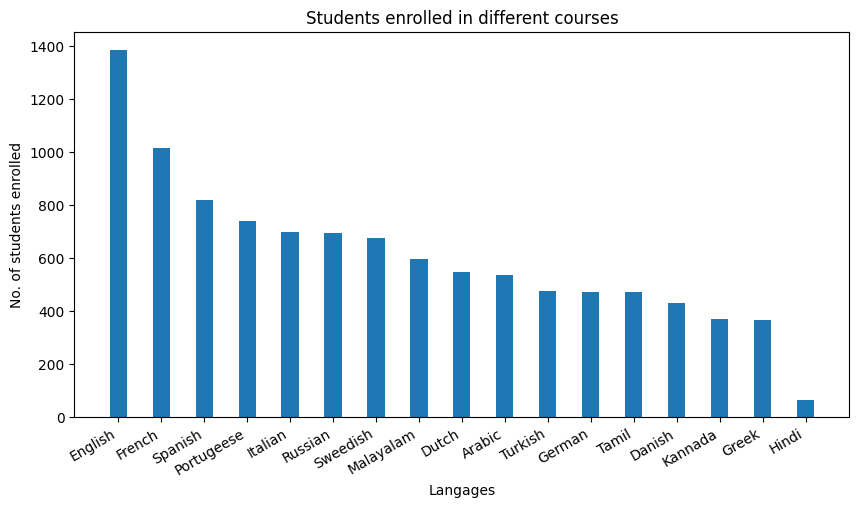

In [333]:
#plotting the above information using matplotlib
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cardinality_languages.index, cardinality_languages.values,
        width = 0.4)
 
plt.xlabel("Langages")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
avg_value=sum(cardinality_languages.values)/len(cardinality_languages.values)
plt.xticks(rotation=30, ha='right')

plt.show()

In [334]:
#Computing the 
import numpy as np
from math import sqrt
elements=np.array(cardinality_languages.values)

avg_value=np.average(elements)
var=np.var(elements)
max_value=np.max(elements)
min_value=np.min(elements)

print('AVG value',avg_value)
print('VAR value', sqrt(var))
print('Max number of text:',max_value,'(',cardinality_languages.index[0],')')
print('Min number of text', min_value, '(',cardinality_languages.index[len(cardinality_languages)-1],')')


AVG value 608.0588235294117
VAR value 282.96403234088945
Max number of text: 1385 ( English )
Min number of text 63 ( Hindi )


### 2. Data processing (setting classification labels)
#### Class encoding (1: Italian, 0: Not italian)

In [335]:

original_dataset['Class'] = np.where(original_dataset['Language']== 'Italian', 1, 0)
original_dataset.head(10)

,Text,Language,Class
0,"Nature, in the broadest sense, is the natural...",English,0
1,"""Nature"" can refer to the phenomena of the phy...",English,0
2,"The study of nature is a large, if not the onl...",English,0
3,"Although humans are part of nature, human acti...",English,0
4,[1] The word nature is borrowed from the Old F...,English,0
5,"[2] In ancient philosophy, natura is mostly us...",English,0
6,"[3][4] \nThe concept of nature as a whole, the...",English,0
7,During the advent of modern scientific method ...,English,0
8,"[5][6] With the Industrial revolution, nature ...",English,0
9,"However, a vitalist vision of nature, closer t...",English,0


In [336]:
#Analyzing the cardinality of italian and not italian datapoints present in the dataset
italian_entry=original_dataset[original_dataset.Class == 1].shape[0]
other=original_dataset.shape[0]-italian_entry
total=original_dataset.shape[0]
print('total',total)
print('Non-italian', other)
print('Italian',italian_entry)

print('Total:',total, '100%')

print('Not italian:',other,int((other/total)*100),'%')
print('Italian:',italian_entry,int((italian_entry/total)*100),'%')


total 10337
Non-italian 9639
Italian 698
Total: 10337 100%
Not italian: 9639 93 %
Italian: 698 6 %


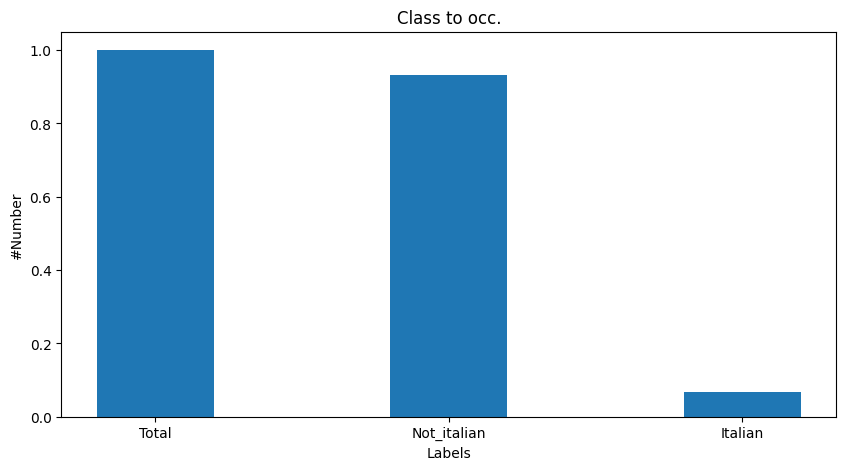

In [337]:
#Plotting the data computed in the prev. cell
entyes={'Total':total/total ,'Not_italian':other/total, 'Italian': italian_entry/total}
Label = list(entyes.keys())
occ = list(entyes.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Label, occ,
        width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("#Number")
plt.title("Class to occ.")
plt.show()

### Notes
#### As we can see the number of italian datapoints present in the dataset are roughly 6% of the training and testing dataset.  Agumentation is needed to handle this unbalance data

# ===============================================================

## 3. Parsing data
### The first version of the parsing method removes all the extra values from the text field of the dataset such as punctuation, numbers, and wikipedia references (es.[4],[7]).
### It also transforsm in lower case each input text

In [338]:
import re
import string
def format_values(text):
    text=re.sub(r"[!#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]",'',text)  #punctuations
    text = '' .join((z for z in text if not z.isdigit()))
    
    text=re.sub(r'"','',text)
    #special handling of the ' char
    text=re.sub(r"'",' ',text)
    text=re.sub(r'[[]]','',text)
    text=re.sub(r"\r\n", '', text)
    text=text.lower()
    text=text.strip()
    #second processing of the text
    text=text.translate(str.maketrans('','',string.punctuation))
    return text

In [339]:
#textProcessing
import re
data_list=[]
paresed_dataset=original_dataset.copy()
paresed_dataset['Text']=paresed_dataset['Text'].apply(format_values)
paresed_dataset.head(10)


  



,Text,Language,Class
0,nature in the broadest sense is the natural ph...,English,0
1,nature can refer to the phenomena of the physi...,English,0
2,the study of nature is a large if not the only...,English,0
3,although humans are part of nature human activ...,English,0
4,the word nature is borrowed from the old frenc...,English,0
5,in ancient philosophy natura is mostly used as...,English,0
6,the concept of nature as a whole the physical ...,English,0
7,during the advent of modern scientific method ...,English,0
8,with the industrial revolution nature increasi...,English,0
9,however a vitalist vision of nature closer to ...,English,0


In [340]:
#Saving the parsed dataset
paresed_dataset.to_csv('..\\..\\Dataset\\Lang_det_parsed.csv')

In [341]:
thresh=int(0.1*other)
thresh


963

## 5. Analyziong elements by column text
### 5.1 common words italian and not italian
### 5.2 common n-grams italian and not italian

### 5.1 Common words italian

In [342]:
import random
def get_mean_len(elements):
    sum_lenghts=0
    max=0
    min=np.infty
    N=len(elements)
    for e in elements:
        i=random.randint(0,50)
        if i ==1:
            print(e)
        words=e.split(' ')
        words_len=len(words)
        if words_len>max:
            max=words_len
        if words_len<min:
            min=words_len
        sum_lenghts+=words_len

    return sum_lenghts/N
        

        

In [343]:
def count_words(e):
    e=str(e)
    words=e.split(' ')
    if words[0]=='':
        return len(words)-1
    return len(words)

In [344]:
def count_spaces(e):
    count=0
    e=str(e)
    for i in e:
        if i==' ':
            count+=1
    return count

In [345]:
#reading the dataset
paresed_dataset=pd.read_csv('..\\..\\Dataset\\Lang_det_parsed.csv')

paresed_dataset['Number of words']=paresed_dataset['Text'].apply(count_words)
paresed_dataset['Number of spaces']=paresed_dataset['Text'].apply(count_spaces)
paresed_dataset.head(10)





,Unnamed: 0,Text,Language,Class,Number of words,Number of spaces
0,0,nature in the broadest sense is the natural ph...,English,0,13,12
1,1,nature can refer to the phenomena of the physi...,English,0,16,15
2,2,the study of nature is a large if not the only...,English,0,14,13
3,3,although humans are part of nature human activ...,English,0,19,18
4,4,the word nature is borrowed from the old frenc...,English,0,30,29
5,5,in ancient philosophy natura is mostly used as...,English,0,38,37
6,6,the concept of nature as a whole the physical ...,English,0,50,49
7,7,during the advent of modern scientific method ...,English,0,23,22
8,8,with the industrial revolution nature increasi...,English,0,41,40
9,9,however a vitalist vision of nature closer to ...,English,0,21,20


In [346]:
#filtering phrase contining 0 words
paresed_dataset=paresed_dataset[paresed_dataset['Number of words']>0]
paresed_dataset=paresed_dataset[paresed_dataset['Text']!='']

paresed_dataset.to_csv('..\\..\\Dataset\\Lang_det_parsed.csv')




In [347]:
#checking if the data is consistant (number of spaces=number of words -1)
paresed_dataset['Good_Text']=np.where(paresed_dataset['Number of words']== paresed_dataset['Number of spaces']+1, 1, 0)
bad_data=paresed_dataset.loc[paresed_dataset['Good_Text'] == 0]
print('Number of bad phrases:',bad_data.shape[0])
#there is no bad text in the parsed datasource

Number of bad phrases: 23


#### Analyzing word stats for italian and not italian observation

In [348]:
#AVG word length of italian texet
italian_avg_words4entry=paresed_dataset[paresed_dataset['Class']==1]['Number of words'].mean()
print("AVG words in italian sentence",italian_avg_words4entry)

AVG words in italian sentence 22.640401146131804


In [349]:
#AVG word lenght for not italian phrases
not_italian=paresed_dataset[paresed_dataset['Class']==0]['Number of words'].mean()
print("AVG words in not-italian sentence",not_italian)

AVG words in not-italian sentence 19.419130615209045


### Creating a word to count of italian words to see the corpus of the dataset

In [350]:
#general function to create a dict <word, count>
def fun_word2count(data):
    word2count=dict()
    
    for i in data:
        try:
            words=i.split(' ')
            for w in words:
                if w in word2count:
                    word2count[w]+=1
                else:
                    word2count[w]=1
        except:
            word2count[w]=1
    word2count=dict(sorted(word2count.items(), key=lambda x: x[1], reverse=True))
    return word2count


    
    
        

In [351]:
#plotting the word
def plot_word2count(word2count,sample):
    words=list(word2count.keys())
    occ=list(word2count.values())
    words_sample=words[0:sample]
    occ_sample=occ[0:sample]
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    
    fig = plt.figure(figsize = (20, 20))
    
    # creating the bar plot
    plt.barh(words_sample, occ_sample,)
    
    plt.xlabel("#occ")
    plt.ylabel("words")
    plt.title("Class to occ.")
    plt.yticks(rotation=40)
    plt.show()

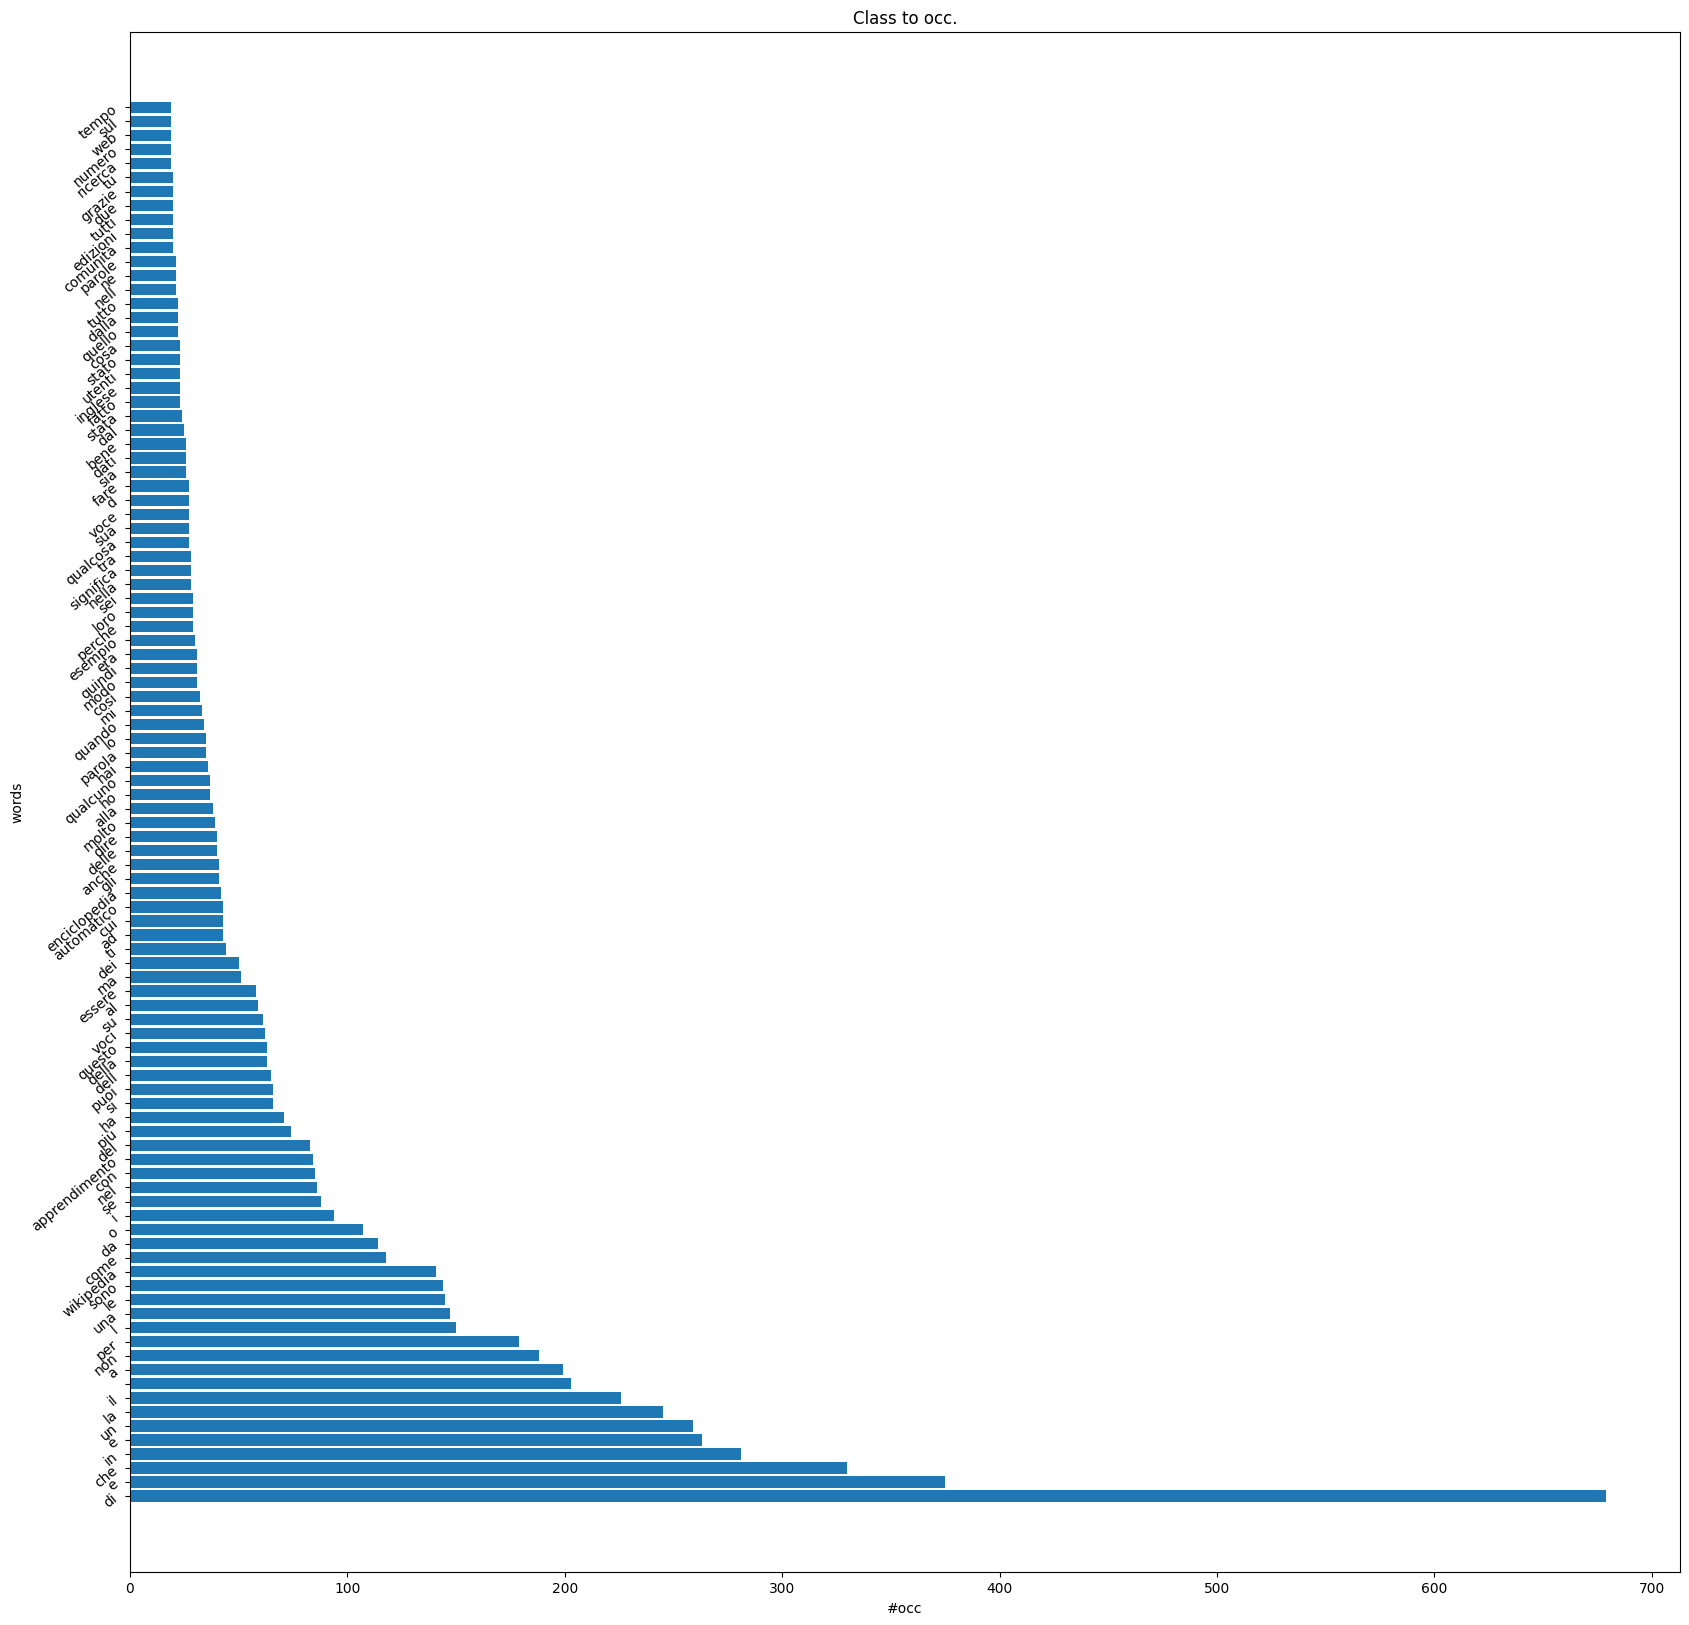

c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Wissel\OneDrive\Desktop\Translated\Project\.venv\lib\site-packages\IPython\core\py

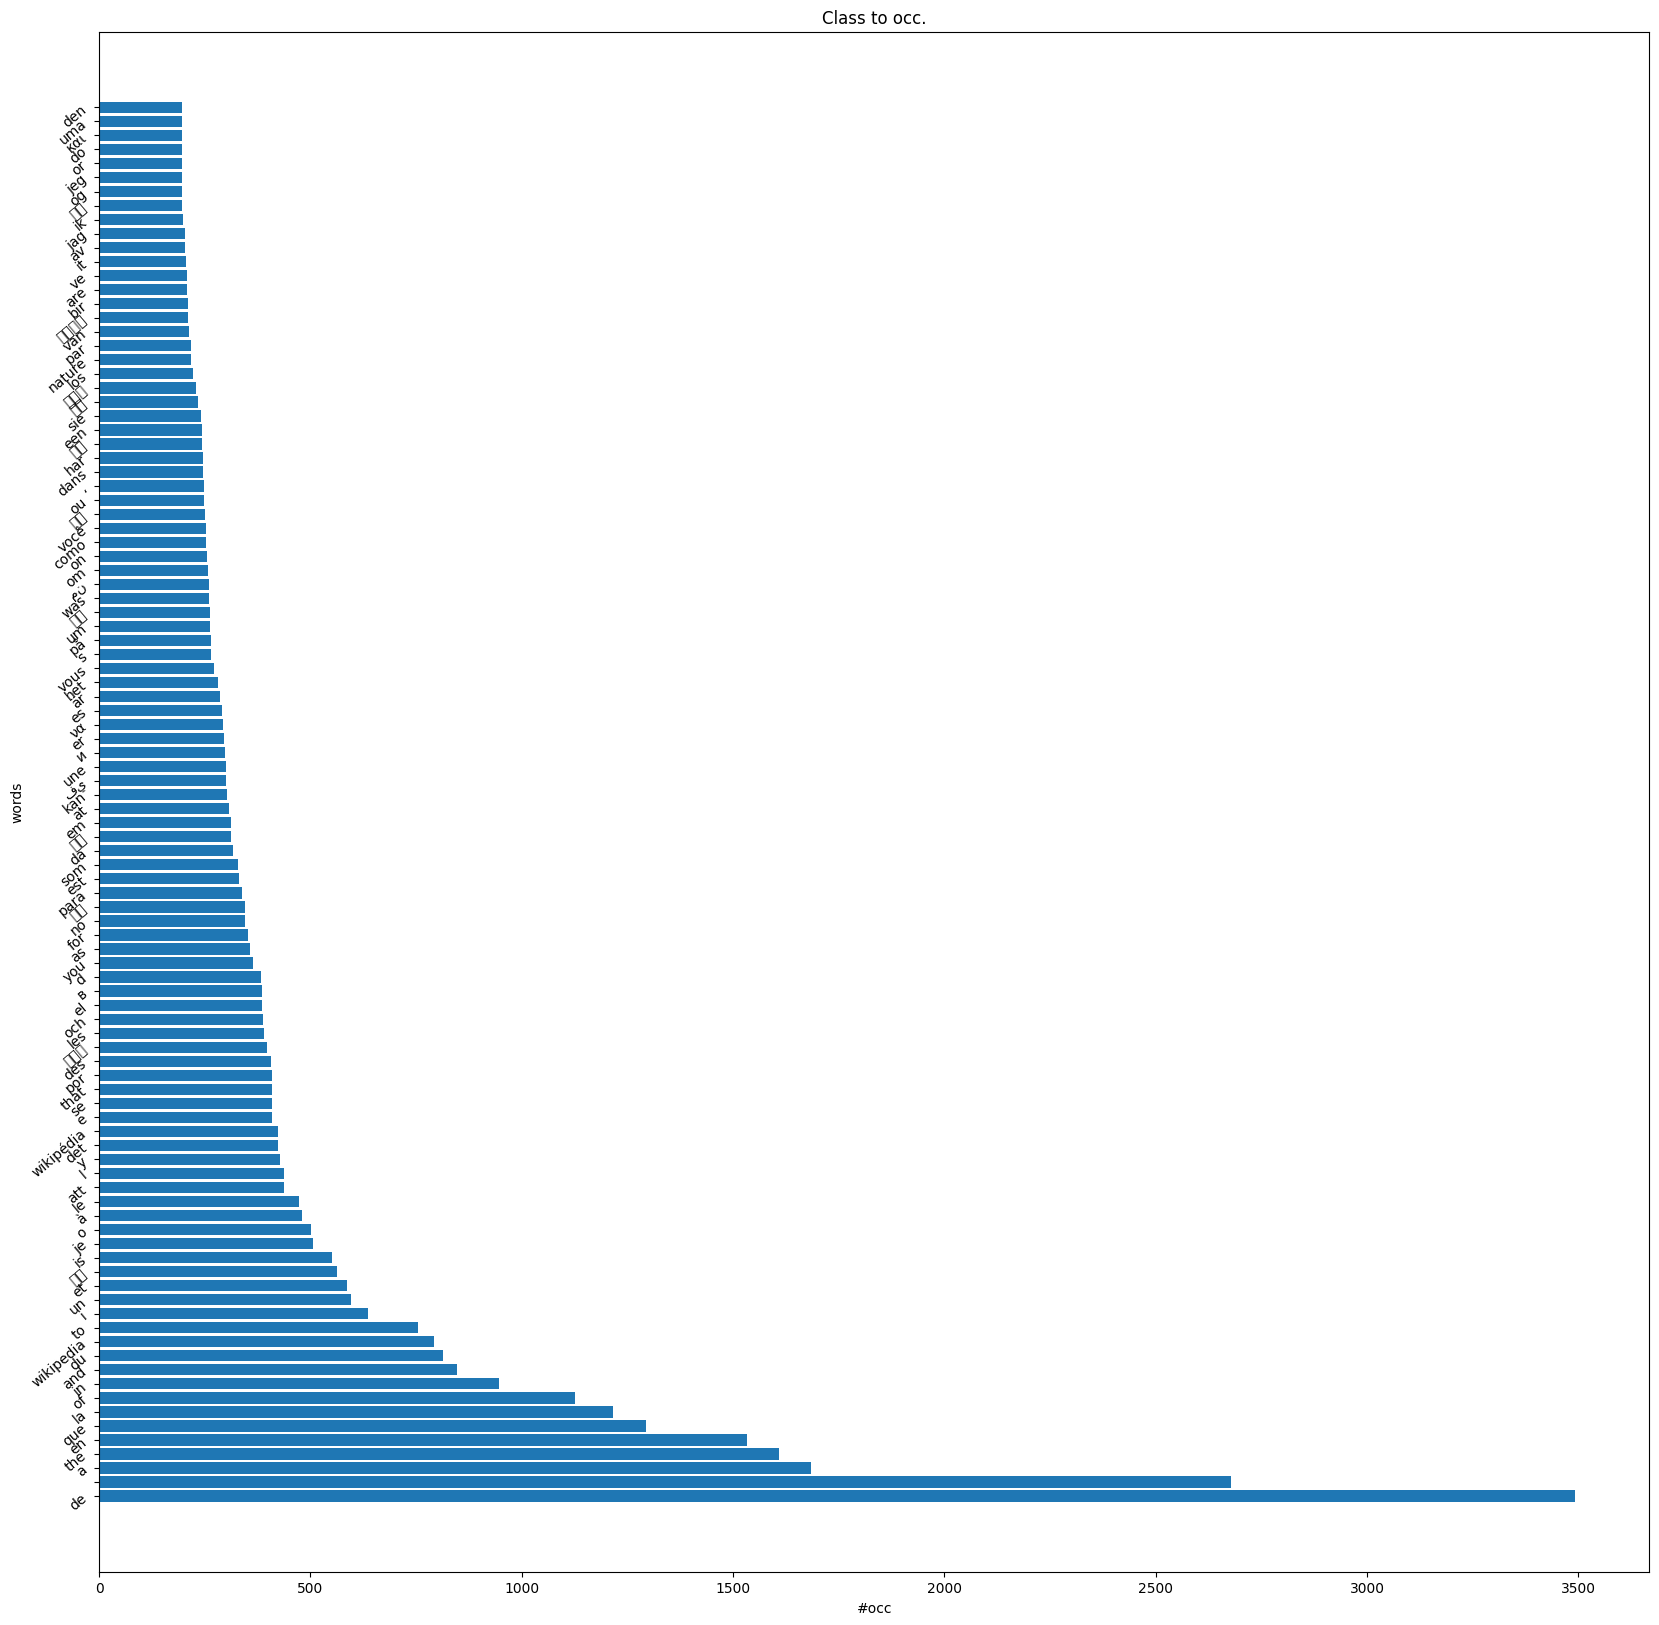

In [352]:
#Computing the dict <word, count> for both italian and not italina phrases
only_italian=paresed_dataset[paresed_dataset['Class']==1]['Text']
not_italian=paresed_dataset[paresed_dataset['Class']==0]['Text']

word2count_ita=fun_word2count(only_italian)
word2count_other=fun_word2count(not_italian)
sample=100
plot_word2count(word2count_ita,sample)
plot_word2count(word2count_other,sample)

#### Shared words in italian and not italian phrases

In [353]:
#Estimating words present in both italain and not italian vocabolary

italian_words=set(word2count_ita.keys())    #set of itlaian words (italain vocabolary)

#looking for the number of repeted words as rows*mean_words4prhase-total_unique_words)
rows=len(only_italian)
total_unique_words=len(word2count_ita)
total_words=italian_avg_words4entry*rows
words_not_unique=total_words-total_unique_words
print('Expected total words',total_words)
print('Total unique words:',total_unique_words)
print('potential not unique',words_not_unique)


#this means that 4199 of words appear only in one phrase, meaning that by itself it does not hold
#informative value when detecting the lang of a text
#To properly classify the languge we should relay more on the hole phrase and give less enphasis on the single word



Expected total words 15803.0
Total unique words: 3757
potential not unique 12046.0


#### Shared words in vocabolaries

In [354]:
#lets see now the common and not common words in the two vocabolaries.
#This should give us more information about potential 'not italian' words in 'italian' text and viceversa
#First we get the stats of shared words, then we create a index to find out what words are shared in bot vocabolaries
#=========
#We compute the common words as follow: italian_words.intersection(other_words)
#we compute the not common words as follow: italian_words - other_words


other_words=set(word2count_other.keys())

common_words=italian_words.intersection(other_words)
not_common_words=italian_words.difference(other_words)
print('Italina words',len(italian_words))
print('Other words',len(other_words))
print('Common words',len(common_words))
print('NOT Common words',len(not_common_words))      

print('% common words:',len(common_words)/len(italian_words)*100)
print('% NOT common words:',len(not_common_words)/len(italian_words)*100)


Italina words 3757
Other words 44819
Common words 666
NOT Common words 3091
% common words: 17.726909768432257
% NOT common words: 82.27309023156774


In [355]:
#we compute now the index of the words present in both italian and not italian vocabolary
#the total set is given by the words in the italian vocabolary and the not italian vocabolary
#for each words we associate an intager. (a list is much more space wise complex)
#The integer is embedded as follow:
#0->Not italian
#1->Italian
#2->Not Italian and Italian
#LOGIC
# for each w in Italain_vocabolary:
#       set value of the index[w] to 1
# for each w in Not_italian_vocabolary:
#       if the w is in Italain_vocabolary (meaning it is already present in the index):
#          we set the value of the index[w] to 2
#       else
#          we set the value of the index[w] to 0
index=dict()


#setting the italain words value to 1
for i in italian_words: 
        index[i]=1

for i in other_words:
        if i in index:
                index[i]=2
        else:
                index[i]=0

print(index)   #this is why the base model did not detect the text 'big data è il futuro' as an Italian phrase
    

{'': 2, 'disponibilità': 1, 'rimasto': 1, 'redazionale': 1, 'venir': 2, 'descriverle': 1, 'memoriam': 1, 'magnifico': 1, 'conoscere': 1, 'testi': 1, 'idea': 2, 'pazientemente': 1, 'dispiacerebbe': 1, 'aggiornabile': 1, 'premendo': 1, 'falso': 2, 'raddoppiando': 1, 'greco': 1, 'apprese': 1, 'additandole': 1, 'brockhaus': 2, 'sorgenti': 1, 'farlo': 1, 'filosofia': 2, 'trattazione': 1, 'sarebbe': 1, 'electronica': 2, 'acquisizione': 1, 'sanger': 2, 'paura': 1, 'trovare': 1, 'già': 1, 'ora': 1, 'segnale': 1, 'notato': 1, 'conterrà': 1, 'lascia': 1, 'autorizza': 1, 'fornendo': 1, 'infelice': 1, 'giappone': 1, 'diventare': 1, 'omonimo': 1, 'poterlo': 1, 'macchine': 1, 'infatti': 1, 'li': 2, 'utilizzando': 1, 'crescerà': 1, 'posizione': 1, 'scorrono': 1, 'impareremo': 1, 'avevo': 1, 'assai': 1, 'ellie': 2, 'accurate': 2, 'errore': 1, 'caratteristiche': 1, 'redistribuiti': 1, 'focalizza': 1, 'formulati': 1, 'wired': 2, 'sull': 1, 'cura': 1, 'citato': 1, 'osservato': 1, 'genoma': 1, 'ed': 1, 'f

In [356]:
#lets now create a file csv with all the words in the corpus 
#(both italian and not italian) providing the number counts in italain and not italian phrases
# and where they are present
#we do this by creating a dictionary key->value having: key=word, value=[encoding_of_prov, count]
path_word_2_prov_count='..\\..\\Dataset\\words.csv'
word_2_prov_count={'Word':[],'where':[],'Count_ita':[],'Count_other':[],'Total_count':[]}
for word in index:
    word_2_prov_count['Word'].append(word)
    total_count_ita=0
    total_count_other=0
    if word in word2count_ita:
        total_count_ita+=word2count_ita[word]
    
        
    if word in word2count_other:
        total_count_other+=word2count_other[word]

    total_count=total_count_ita+total_count_other
    

    word_2_prov_count['Count_ita'].append(total_count_ita)
    word_2_prov_count['Count_other'].append(total_count_other)
    word_2_prov_count['Total_count'].append(total_count)
    word_2_prov_count['where'].append(index[word])

dataframe=pd.DataFrame.from_dict(word_2_prov_count).sort_values(by=['Total_count'],ascending=False)
dataframe.head(10)




,Word,where,Count_ita,Count_other,Total_count
15983,de,0,0,3493,3493
0,,2,203,2678,2881
2607,a,2,199,1685,1884
559,the,2,4,1608,1612
30251,en,0,0,1534,1534
2062,la,2,245,1216,1461
11879,que,0,0,1294,1294
1652,in,2,281,946,1227
2178,of,2,3,1126,1129
2467,wikipedia,2,141,792,933


In [357]:
#saving the dataframe 
dataframe.to_csv(path_word_2_prov_count)

In [358]:
#NOTE 1
#analyzing the dataframe we can see that some words that are common in italian 
#conversation such as 'big' are not present in the italian vocabolary
#for this reason, given that the dataset is highly unbalanced and there are missing words in the italian vocabolary,
#a smart way to perform agumentation is to translate english pharase in italian and insert it in the training dataset 
#only if there is a new word 
#more about this in notebook agumentation

#NOTE 2
# Analyzion the words.csv we can see that there are a lot of unique words.
# These could be a problem for the model because they could potentially become 'Out of vocabolary'
 



### NOTE 1
#### Analyzing the data, we can see that the number one problem when working with this dataset is the low number of italian observation. 
#### The root cause of dataset was originally meant for training models for multiclass classification.
#### Transforming the problem from a multiclass classification into a binary classification has created a highly unbalanced dataset that needs to be take care of.
#### The logic used for augmentation is described in Language-Detection\notebooks\Augumentation\Augumentation.ipynb
####
####


### NOTE 2
#### A similar profiling analysis has been created after augmentation to see if the Italian vocabulary has been incremented
#### See Language-Detection\notebooks\Profiling\Profiling_after_augumentation.ipynb


### NOTE 3 (Pre-processing of text)
### Parsing of text
#### For the parsing operation i decided to keep stop words and delete only extra characters such as numbers and punctuations.
#### This is not suggested when working with text classification task such as semantic analysis or NLP in general because they have no informative content related to these tasks. On the other hand, when working with language classification stop words have a higher informative content because, in most cases, they are specific to a language.



### NOTE 4 (improvements)
#### Even if the dataset has been cleared from char not needed for language classification, more work could be done to improve the model performance. By searching for words containing the sequence "wikip" into the 'words_after_agum.csv' it is clear that a lot of entries relate to the same entity.
#### By performing these operations, the total vocabulary (set of all words) could be heavily reduced to the minimal elements, maximizing space efficiency when performing tfidf vectorization
